#### Practicle Simple Linear Regression

- Independent Feature : Height (Inches)

- Dependent Feature : Weight (Pounds)

The goal of the practicle is to create a simple linear regression model which can predict Weight (Dependent feature) when provided with Height (Independent feature).

In [131]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

---

In [132]:
# Read and Analyze Data
df = pd.read_csv('data.csv')

In [133]:
df.head()

,Height (Inches),Weight (Pounds)
0,63.0,123.5
1,63.4,137.2
2,63.9,129.5
3,64.3,121.1
4,64.8,128.6


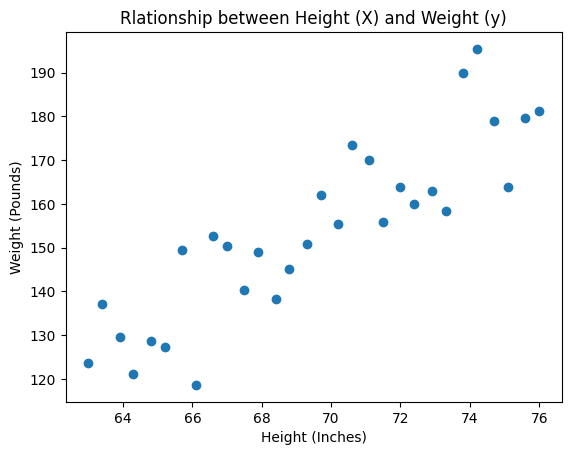

In [134]:
# Visualize the relationship between Height and Weight using plots
plt.scatter(df['Height (Inches)'], df['Weight (Pounds)'])
plt.title('Rlationship between Height (X) and Weight (y)')
plt.xlabel('Height (Inches)')
plt.ylabel('Weight (Pounds)')
plt.show()

### Summary

"The scatter plot clearly displays a moderate to strong positive linear association between Height and Weight. This visual evidence supports the use of simple linear regression, and we expect to find a positive and statistically significant slope coefficient ($b_1$) in our regression analysis, indicating that taller individuals tend to weigh more."

In [135]:
# Let's see correlation
df.corr()

,Height (Inches),Weight (Pounds)
Height (Inches),1.000000,0.877537
Weight (Pounds),0.877537,1.000000


"The correlation matrix confirms a very strong positive linear relationship between Height and Weight, with a Pearson correlation coefficient ($r$) of $0.877537$. This indicates a powerful association where taller individuals are strongly correlated with higher weights.

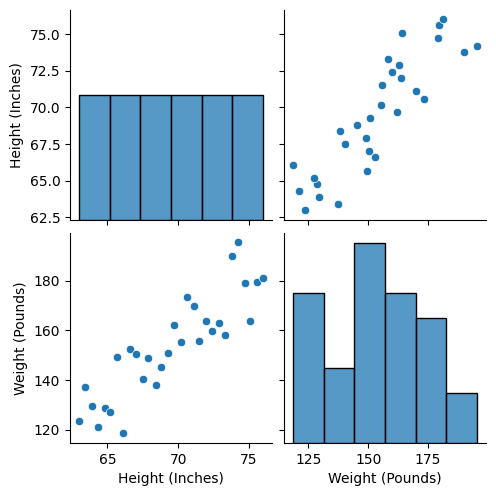

In [136]:
sns.pairplot(data=df)
plt.show()

---

In [137]:
# Divide the dataframe into Independent and Dependent Features

X = df[['Height (Inches)']]    # Independent Feature
y = df['Weight (Pounds)']      # Dependent Feature

*Why do we need independent feature as an DataFrame and Dependent Feature as Series during division of dataset ?*

This is a crucial requirement in many machine learning libraries (like scikit-learn in Python) because:

1. **Independent Features (DataFrame/2D array)**: The model expects multiple features (even if it's only one column in simple regression) and needs the structure to easily handle and transform data with a shape of `(n_samples, n_features)`.

2. **Dependent Feature (Series/1D array)**: The target variable is always a single value per sample, requiring a simple vector structure with a shape of `(n_samples,)` for efficient calculation of errors and loss.

---

In [138]:
# Train - Test Split
from sklearn.model_selection import train_test_split

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

- `train_test_split(arrays, train_size, test_size, random_state)` :

The `train_test_split` function in sklearn is used to split the dataset in two parts: 

- *Training Dataset* : Used to train the model

- *Testing Dataset* : Used to test the model

The important parameters are:

- `arrays` : The data to be split (usually X and y).

- `test_size` : Defines the size of the test set. Can be a float (e.g., 0.30 for 30%) or an int (e.g., 100 samples). If None, it defaults to $0.25$ if train_size is also None.

- `train_size` : Defines the size of the training set. Works similarly to test_size.

- `random_state` : A pseudo-random number seed. If set to an integer (e.g., 42), the split will always be the same. (Highly Recommended for reproducibility.)

In [140]:
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (22, 1)
X_test: (8, 1)
y_train: (22,)
y_test: (8,)


The dataset originally had 30 datapoints. Now the data is divided into 2 parts of $25%$ and $75%$ with 22 values in Training_dataset and 8 values in Testing_dataset.

---

#### Standardization

Standardization, also known as **Z-score scaling** or **zero-mean scaling**, is a feature scaling technique used to transform numerical data so that each feature has:

1.  A **mean ($\mu$) of 0** (centered around zero).
2.  A **standard deviation ($\sigma$) of 1** (scaled to unit variance).

### The Formula

The standardization process transforms an original data point ($x$) into a new, standardized score ($z$) using the following formula:

$$z = \frac{x - \mu}{\sigma}$$
* **$x$**: The original value of the feature.
* **$\mu$**: The mean (average) of the feature's values.
* **$\sigma$**: The standard deviation of the feature's values.

### Why is Standardization Necessary?

Standardization ensures that all features contribute equally to the distance calculation or optimization process in a machine learning model, preventing features with large values from dominating those with small values.

This is especially crucial for algorithms that rely on **distance calculations** or **gradient-based optimization**:

* **Distance-Based Models:** K-Nearest Neighbors (KNN), K-Means Clustering, Support Vector Machines (SVM). If unstandardized, a feature like "Salary" (in thousands) would unfairly dominate a feature like "Number of Children" (single digits) in distance calculations.
* **Gradient-Based Models:** Linear Regression (with Gradient Descent), Logistic Regression, Neural Networks. Scaling the features helps the optimization process (gradient descent) converge much faster and more smoothly. 

In [141]:
# Standardization :
from sklearn.preprocessing import StandardScaler

In [142]:
scaler = StandardScaler()

In [143]:
# standardizing training data
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.10034021],
       [-1.50274214],
       [-1.03527483],
       [ 0.36712711],
       [-0.9313932 ],
       [ 0.00354142],
       [-0.23019224],
       [ 1.06832807],
       [-1.39886052],
       [-1.26900848],
       [ 1.40594335],
       [-1.16512686],
       [ 0.93847604],
       [ 1.53579538],
       [ 0.60086076],
       [ 1.87341067],
       [ 0.83459442],
       [-0.69765955],
       [-0.33407386],
       [ 0.13339345],
       [ 0.70474239],
       [-0.80154117]])

In [144]:
# Standardizing test data
X_test = scaler.transform(X_test)
X_test

array([[ 1.63967701],
       [ 0.23727507],
       [ 1.1722097 ],
       [ 0.47100873],
       [-0.56780752],
       [-0.46392589],
       [ 1.76952904],
       [ 1.30206173]])

#### 🔑 Why Standardize **AFTER** the Train-Test Split?

This is a critical concept to avoid **Data Leakage**.

| Step | Data Used | Purpose |
| :--- | :--- | :--- |
| **1. Split** | Whole Dataset | Divide into `Train` and `Test` sets. |
| **2. FIT on Train** | **$X_{train}$ ONLY** | Calculate the mean ($\mu_{train}$) and standard deviation ($\sigma_{train}$) *only* from the training data. |
| **3. TRANSFORM** | **$X_{train}$ and $X_{test}$** | Apply the calculated $\mu_{train}$ and $\sigma_{train}$ to both the training data and the testing data. |

##### The Reason (Preventing Data Leakage)

The test set is supposed to simulate **unseen, real-world data**. If you calculate the mean and standard deviation from the *entire* dataset (including the test set) before splitting, you are effectively using information from the test set to transform the training data.

This **"leaks"** future information into the model training process, leading to:

* **Overly Optimistic Evaluation:** Your model will likely show a better performance on the test set than it would on truly new, unseen data in production.
* **Poor Generalization:** The model learns a relationship specific to your dataset, rather than a general pattern in the population.

**The Golden Rule in Machine Learning Preprocessing:**

> **Only call `.fit()` on the training data, and then call `.transform()` (or `.fit_transform()`) on the training data, and only call `.transform()` on the test data.**

---

In [145]:
# Apply simple linear regression
from sklearn.linear_model import LinearRegression

In [146]:
# Initializa the model
regression = LinearRegression()

The `LinearRegression` object in scikit-learn (`sklearn.linear_model.LinearRegression`) is the implementation of the classic **Ordinary Least Squares (OLS) Linear Regression**. It's the standard model used to fit a linear equation to a set of observations.

Here is a detailed explanation of its purpose, how it works, its key attributes, and its methods.

---

#### 1. 🎯 Purpose and Mathematical Basis

##### A. Core Goal
The primary goal of the `LinearRegression` object is to model the relationship between one or more independent variables (features, $X$) and a single dependent variable (target, $y$) by fitting a linear equation to the observed data.

##### B. The Model Equation
The model finds the coefficients ($\beta$) that minimize the sum of the squared differences (residuals) between the observed $y$ values and the predicted $\hat{y}$ values.

* **Simple Linear Regression (One Feature):**
    $$\hat{y} = \beta_0 + \beta_1 x$$
* **Multiple Linear Regression (Many Features):**
    $$\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n$$

##### C. Solution Method
The `LinearRegression` object solves for the optimal coefficients using a closed-form solution based on the **Normal Equation** (analytical solution), which is efficient for smaller to moderately sized datasets.

---

#### 2. ⚙️ Key Methods

The `LinearRegression` object follows the standard scikit-learn estimator API, primarily relying on two methods:

##### A. `.fit(X, y)`
* **Action:** This is the training step. The model computes the optimal coefficients ($\beta$ values) and the intercept ($\beta_0$) that minimize the sum of squared errors between the predicted values and the actual values.
* **Input:**
    * `X`: The training data (independent features), usually a 2D array/DataFrame of shape `(n_samples, n_features)`.
    * `y`: The target values (dependent variable), usually a 1D array/Series of shape `(n_samples,)`.

In [147]:
regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### ✨ Important Attributes (Results)

Once the model has been fitted (`.fit()` is called), the following attributes become available:

| Attribute | Description | Mathematical Notation |
| :--- | :--- | :--- |
| **`.coef_`** | The estimated **coefficients** for the independent variables. | $\beta_1, \beta_2, \dots, \beta_n$ |
| **`.intercept_`** | The estimated **y-intercept** (the predicted $y$ value when all $x$ features are zero). | $\beta_0$ |
| **`.n_features_in_`** | The number of features seen during the fit. | |
| **`.feature_names_in_`** | Feature names seen during the fit (if the input was a Pandas DataFrame). | |

**Interpretation Example:**
If `model.coef_` is `[18.50]`:
* "A one-standard-deviation increase in the predictor leads to an 18.50 standard-deviation increase in the dependent variable."

In [148]:
print(f'coefficient/Slope: {regression.coef_}')

coefficient/Slope: [18.50794949]


In [149]:
print(f'Intercept: {regression.intercept_}')

Intercept: 149.1727272727273


In [150]:
print(f'Number of Features seen during the fit: {regression.n_features_in_}')

Number of Features seen during the fit: 1


##### B. `.predict(X)`
* **Action:** Uses the coefficients learned during the `.fit()` step to generate predictions for new data.
* **Input:**
    * `X`: New data (independent features) for which you want predictions, a 2D array/DataFrame of shape `(n_samples, n_features)`.
* **Output:** The predicted target values ($\hat{y}$), a 1D array/Series of shape `(n_samples,)`.

*Creating a beat fit line for the training data*

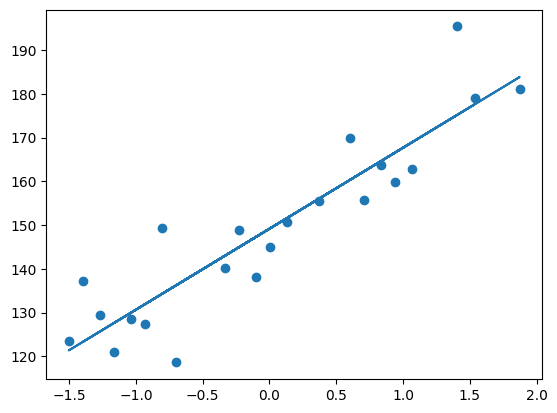

In [151]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))
plt.show()

##### Prediction for test data (unseen data) using `regression.predict()` :

1. Predicted Weight Output = $intercept + coef (Weights)$

2. y_pred = $149.17 + 18.50 (Xtest)$

In [152]:
y_pred = regression.predict(X_test)
y_pred

array([179.51978654, 153.56420237, 170.86792515, 157.89013307,
       138.66377442, 140.58641029, 181.92308137, 173.27121998])

---

#### Perforance Metrices:

In [153]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

##### Mean Squared Error (MSE)
The average of the squared differences between the predicted values and the actual values.

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2$$

Where:
* $n$ is the total number of data points.
* $Y_i$ is the actual (observed) value for the $i$-th data point.
* $\hat{Y}_i$ is the predicted value for the $i$-th data point.

In [154]:
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse} ')

Mean Squared Error: 160.511309234149 


##### Mean Absolute Error (MAE)
The average of the absolute differences between the predicted values and the actual values.

$$MAE = \frac{1}{n} \sum_{i=1}^{n} |Y_i - \hat{Y}_i|$$

Where:
* $n$ is the total number of data points.
* $Y_i$ is the actual (observed) value for the $i$-th data point.
* $\hat{Y}_i$ is the predicted value for the $i$-th data point.

In [155]:
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae} ')

Mean Absolute Error: 11.854381616590643 


##### Root Mean Squared Error (RMSE)
The square root of the Mean Squared Error, returning the error metric to the original units of the dependent variable.

$$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2}$$

Where:
* $n$ is the total number of data points.
* $Y_i$ is the actual (observed) value for the $i$-th data point.
* $\hat{Y}_i$ is the predicted value for the $i$-th data point.

In [156]:
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error: {rmse} ')

Root Mean Squared Error: 12.669305791326886 


##### Coefficient of Determination ($R^2$ Score)
This represents the proportion of the variance in the dependent variable that is predictable from the independent variables.

$$R^2 = 1 - \frac{SSE}{SST}$$

Where:
* $SSE$ (Sum of Squared Errors or Residuals) is the variation in $Y$ not explained by the model:
$$SSE = \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2$$
* $SST$ (Total Sum of Squares) is the total variation in $Y$:
$$SST = \sum_{i=1}^{n} (Y_i - \bar{Y})^2$$

In [157]:
R2_score = r2_score(y_test, y_pred)

print(f'R2 Score: {R2_score}')

R2 Score: 0.016835337169989417


##### Adjusted $R^2$ Score
This modifies the $R^2$ to account for the number of predictors in the model, penalizing the inclusion of irrelevant variables.

$$\text{Adjusted } R^2 = 1 - (1 - R^2) \frac{n - 1}{n - k - 1}$$

Where:
* $R^2$ is the Coefficient of Determination.
* $n$ is the total number of data points (samples).
* $k$ is the number of independent variables (predictors) in the model.

In [158]:
1 - (1 - R2_score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] -1)

-0.14702543996834572

---

#### Simple Linear Regression using OLS (Ordinary Least Square):

In [159]:
import statsmodels.api as sm

In [160]:
model = sm.OLS(y_train, X_train).fit()

In [161]:
prediction = model.predict(X_test)
prediction

array([ 30.34705927,   4.3914751 ,  21.69519788,   8.71740579,
       -10.50895285,  -8.58631699,  32.7503541 ,  24.09849271])

In [162]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:        Weight (Pounds)   R-squared (uncentered):                   0.015
Model:                            OLS   Adj. R-squared (uncentered):             -0.032
Method:                 Least Squares   F-statistic:                             0.3222
Date:                Mon, 15 Dec 2025   Prob (F-statistic):                       0.576
Time:                        12:05:57   Log-Likelihood:                         -141.36
No. Observations:                  22   AIC:                                      284.7
Df Residuals:                      21   BIC:                                      285.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

*From the Summary:*:

- The coefficient is similar to that of LinearRegression model.

---

##### Predicting Weight (Output) with Height (unseen input)

In [163]:
regression.predict(scaler.transform([[65]]))

c:\Users\ASUS\anaconda3\envs\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([130.97323097])

* so for 65 inches of height the persons weight is 130 pounds